# Ecommerce Data Analytics Dataset EDA

# Question 1 

## Are there any regular customers? If so, are they the most profitable ones?

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
df = pd.read_csv("superstore.csv")

In [173]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          51290 non-null  int64  
 1   order_id        51290 non-null  object 
 2   order_date      51290 non-null  object 
 3   ship_date       51290 non-null  object 
 4   ship_mode       51290 non-null  object 
 5   customer_id     51290 non-null  object 
 6   customer_name   51290 non-null  object 
 7   segment         51290 non-null  object 
 8   city            51290 non-null  object 
 9   state           51290 non-null  object 
 10  country         51290 non-null  object 
 11  postal_code     9994 non-null   float64
 12  market          51290 non-null  object 
 13  region          51290 non-null  object 
 14  product_id      51290 non-null  object 
 15  category        51290 non-null  object 
 16  sub-category    51290 non-null  object 
 17  product_name    51290 non-null 

In [175]:
df.isnull().sum()
# Since got over 80% null values for postal code, lets drop it

row_id                0
order_id              0
order_date            0
ship_date             0
ship_mode             0
customer_id           0
customer_name         0
segment               0
city                  0
state                 0
country               0
postal_code       41296
market                0
region                0
product_id            0
category              0
sub-category          0
product_name          0
sales                 0
quantity              0
discount              0
profit                0
shipping_cost         0
order_priority        0
dtype: int64

In [176]:
df = df.drop('postal_code', axis=1)

In [177]:
# Checking for any duplicated entries
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [row_id, order_id, order_date, ship_date, ship_mode, customer_id, customer_name, segment, city, state, country, market, region, product_id, category, sub-category, product_name, sales, quantity, discount, profit, shipping_cost, order_priority]
Index: []

[0 rows x 23 columns]


In [178]:
# Lets check the statistics and also check for any anomalies
df.describe()

,row_id,sales,quantity,discount,profit,shipping_cost
count,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,22638.480000,14.000000,0.850000,8399.976000,933.570000


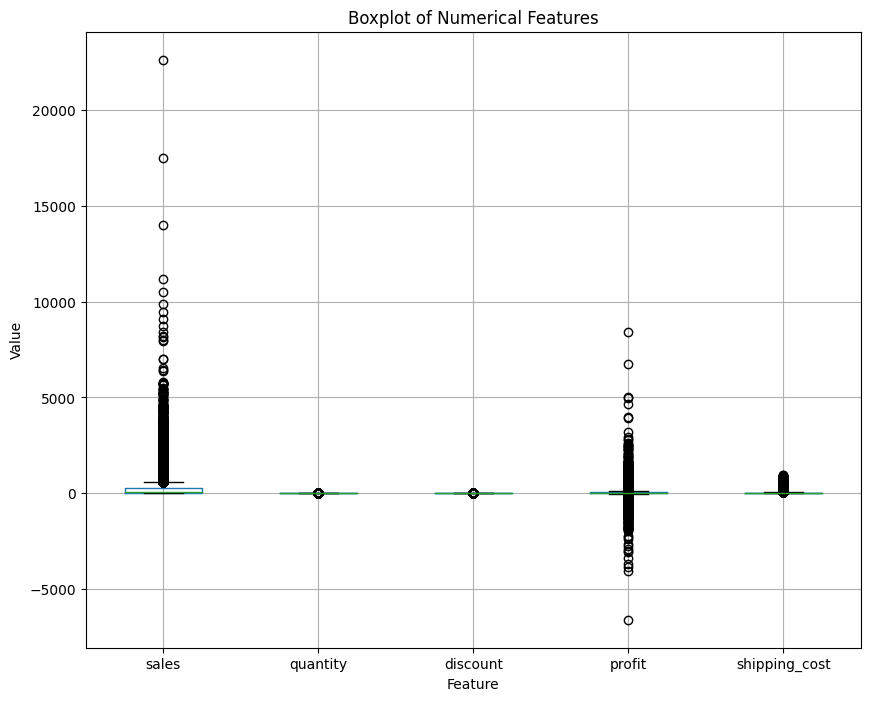

In [179]:
# Check if got any anomalies by boxplot

numerical_features = ['sales', 'quantity', 'discount','profit','shipping_cost']

# Create a boxplot for each numerical feature
fig, ax = plt.subplots(figsize=(10, 8))
df[numerical_features].boxplot(ax=ax)
ax.set_xlabel('Feature')
ax.set_ylabel('Value')
ax.set_title('Boxplot of Numerical Features')
plt.show()

# Looks like got some anomalies for sales >12500, going to remove later
# profit have an entry that is more than -5000, going to remove later too

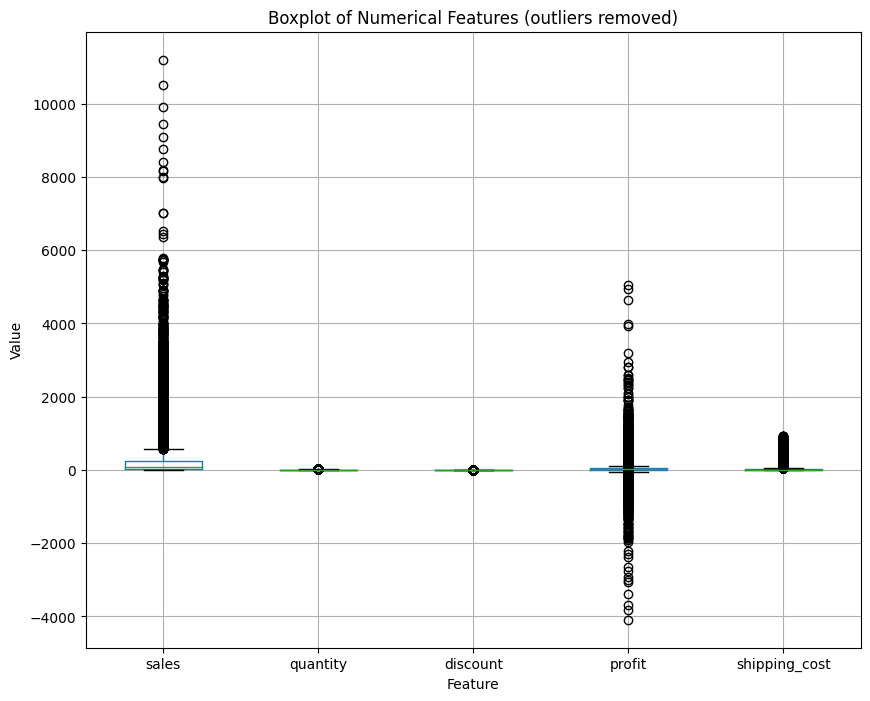

In [180]:
# Removing the anomalies

# Define the upper limits for the 'sales' and 'profit' features
sales_upper_limit = 12500
profit_upper_limit = -5000

# Filter out the outliers in the 'sales' and 'profit' features
df = df[df['sales'] <= sales_upper_limit]
df = df[df['profit'] >= profit_upper_limit]

# Select the numerical features in your DataFrame
numerical_features = ['sales', 'quantity', 'discount','profit','shipping_cost']

# Create a boxplot for each numerical feature
fig, ax = plt.subplots(figsize=(10, 8))
df[numerical_features].boxplot(ax=ax)
ax.set_xlabel('Feature')
ax.set_ylabel('Value')
ax.set_title('Boxplot of Numerical Features (outliers removed)')
plt.show()

In [181]:
# Change the date objects to datetime

df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

C:\Users\eugen\AppData\Local\Temp\ipykernel_14152\2282002168.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['order_date'] = pd.to_datetime(df['order_date'])
C:\Users\eugen\AppData\Local\Temp\ipykernel_14152\2282002168.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['ship_date'] = pd.to_datetime(df['ship_date'])


In [182]:
df.head(2)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium


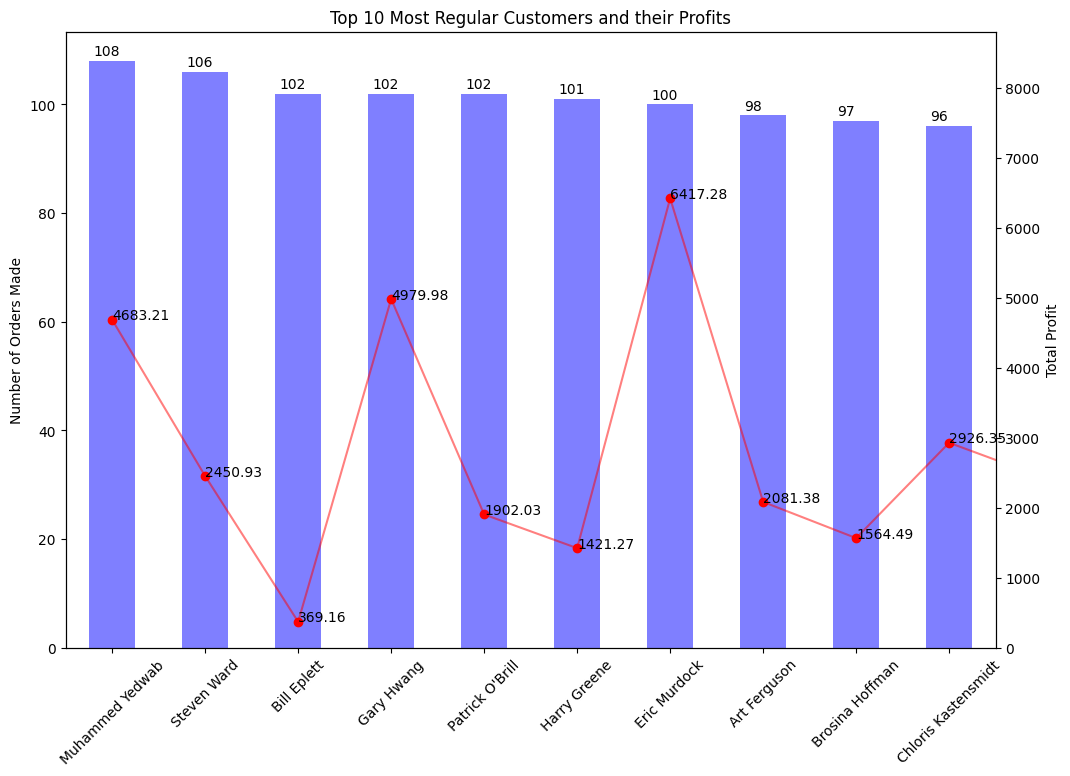

In [200]:
# Visualizing top 10 most regular customers and their respective profits made by the shop

# Group the DataFrame by the 'customer_name' column and calculate the sum of the 'profit' column for each group
total_profit = df.groupby('customer_name')['profit'].sum()

# Get the top 10 customers based on the frequency of their occurrences
top_10_customers = df['customer_name'].value_counts().head(10)

# Increase the figure size and create a subplot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()

# Plot a bar chart of the top 10 customers on the left axis
top_10_customers.plot(kind='bar', ax=ax1, color='blue', alpha=0.5)
ax1.set_ylabel('Number of Orders Made')

# Plot a line chart of the total profit for each customer on the right axis
total_profit.plot(kind='line', ax=ax2, color='red', alpha=0.5)
ax2.set_ylabel('Total Profit')

# Add a scatter plot of the total profit with circle markers
scatter = ax2.scatter(total_profit.index, total_profit.values, marker='o', color='red')

# Add the rounded value of each data point to the circle markers
for i, txt in enumerate(total_profit.values):
    ax2.annotate(str(round(txt, 2)), (total_profit.index[i], total_profit.values[i]))

# Rotate the x-tick labels
ax1.set_xticklabels(top_10_customers.index, rotation=45)

# Add the number above each bar
for i, v in enumerate(top_10_customers):
    ax1.text(i - 0.2, v + 1, str(v))
    
# Add a title and axis labels
plt.title('Top 10 Most Regular Customers and their Profits')

# Set the y-axis limits for each axis
ax1.set_ylim([0, ax1.get_ylim()[1]])
ax2.set_ylim([0, ax2.get_ylim()[1]])

plt.show()

# Here we can see that being the most regular customer (made the most number of orders) does not correspond to
# the highest profits

# Out of the top 10 regular customers, customer Eric Murdock is the most profitable

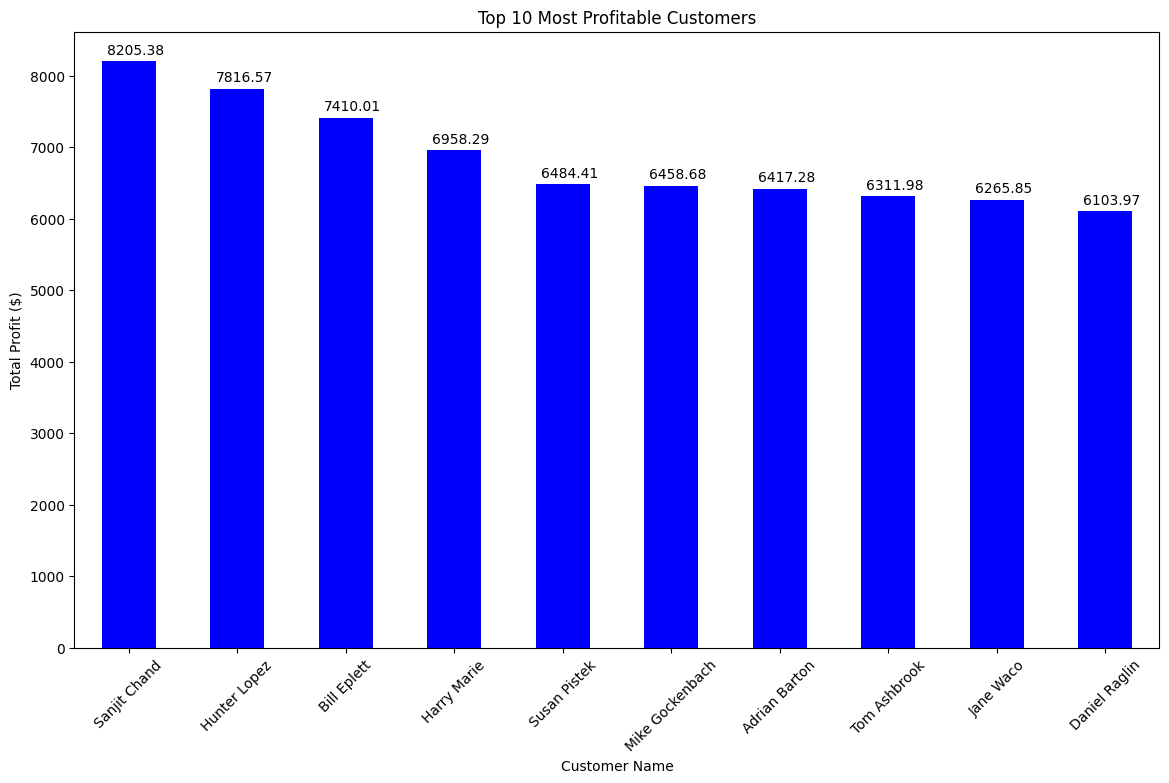

In [184]:
# Visualize top 10 most profitable customers

# Group the DataFrame by the 'customer_name' column and calculate the sum of the 'profit' column for each group
total_profit = df.groupby('customer_name')['profit'].sum()

# Get the top 10 most profitable customers
top_10_customers = total_profit.nlargest(10)

# Create a bar plot of the top 10 most profitable customers
fig, ax = plt.subplots(figsize=(14, 8))
top_10_customers.plot(kind='bar', color='blue', ax=ax)

# Add the value of each bar above it
for i, v in enumerate(top_10_customers):
    ax.text(i - 0.2, v + 100, str(round(v, 2)))

# Add a title and axis labels
plt.title('Top 10 Most Profitable Customers')
plt.xlabel('Customer Name')
plt.ylabel('Total Profit ($)')

plt.xticks(rotation=45)

plt.show()

# Here we can see that the most profitable customer is Sanjit Chand and interesting, 
# Sanjit was not even the top 10 regular customers
# This shows that making more orders does not mean that it is the most profitable

C:\Users\eugen\AppData\Local\Temp\ipykernel_14152\244381382.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

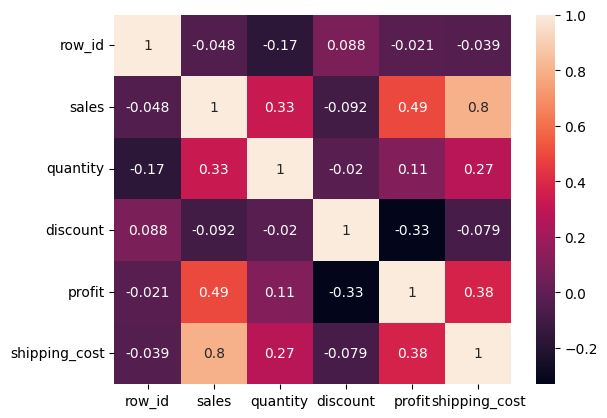

In [201]:
corr_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True)

# We can see that sales has the highest correlation to profitability

## To conclude for Q1, there are regular customers but however, they are not the most profitable ones

# Question 2 

## Which product sub-categories are responsible for most negative profit from sales?


In [185]:
df['sub-category'].value_counts()

Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2221
Appliances     1755
Machines       1484
Tables          861
Name: sub-category, dtype: int64

In [186]:
df_sorted = df.sort_values('profit', ascending=True)
df_sorted = df_sorted['profit'].head(10)

In [187]:
df_sorted

43136   -4088.3760
15886   -3839.9904
42767   -3701.8928
28813   -3399.9800
11889   -3059.8200
22943   -3009.4350
17606   -2929.4845
45748   -2750.2800
25060   -2639.9912
37463   -2380.3500
Name: profit, dtype: float64

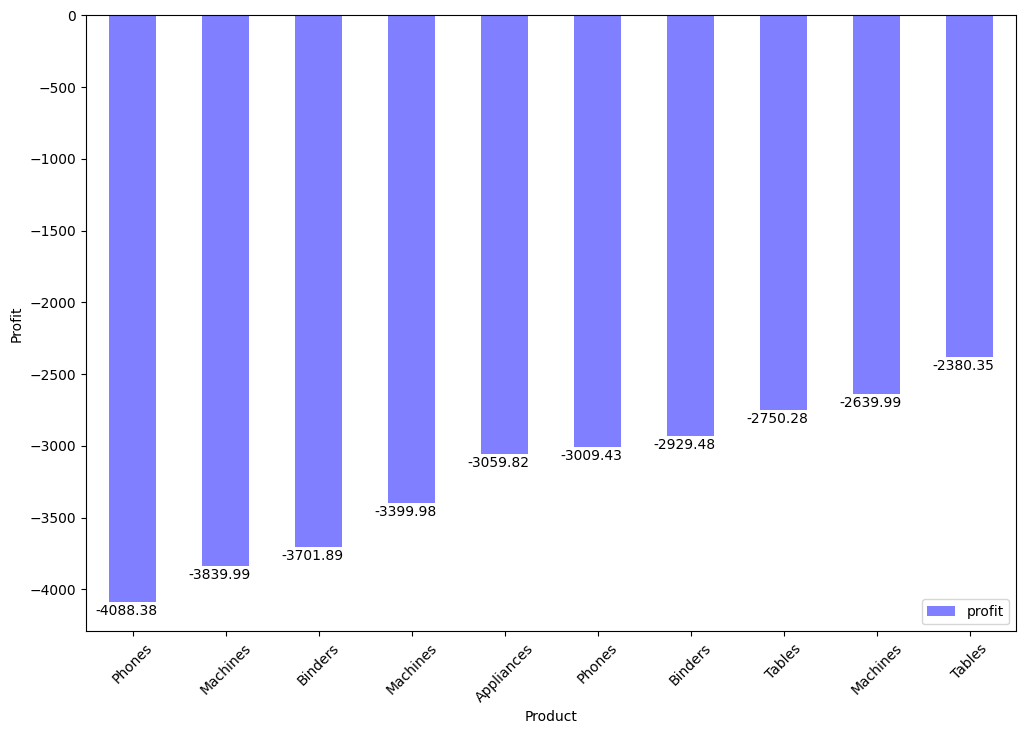

In [188]:
# Visualize the top 10 products with the worst profits

worst_profits = df.sort_values('profit').head(10)

# Create a bar plot of the worst profits for each product
fig, ax = plt.subplots(figsize=(12, 8))
worst_profits.plot(kind='bar', x='sub-category', y='profit', ax=ax, color='blue', alpha=0.5)
ax.set_ylabel('Profit')
ax.set_xlabel('Product')

# Add the number above each bar
for i, v in enumerate(worst_profits['profit']):
    ax.text(i - 0.4, v - 90, str(round(v, 2)))
    
plt.xticks(rotation=45)

plt.show()

## Conclusion for Q2, phones brings in the most negative profit

# Question 3

# Is there any trend with regard to how different product categories sell over time?

In [189]:
df['category'].value_counts()

Office Supplies    31273
Technology         10137
Furniture           9876
Name: category, dtype: int64

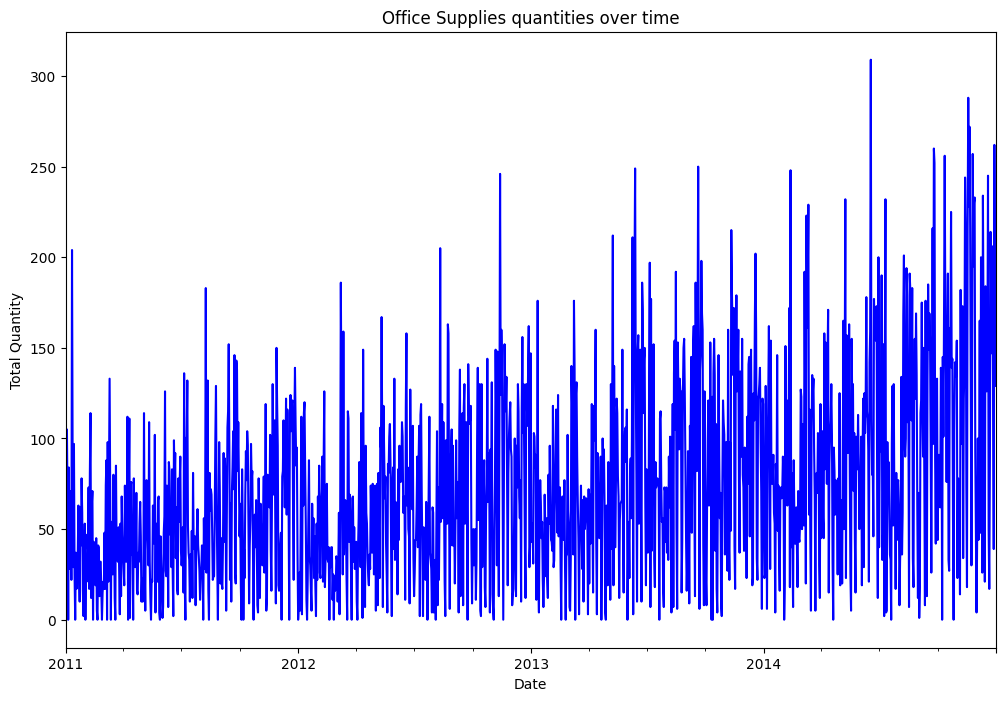

In [190]:
# Get the first unique value in the 'category' column
first_category = df['category'].unique()[0]

# Filter the DataFrame by the first category
df_filtered = df[df['category'] == first_category]

# Resample the filtered DataFrame by day to get the total quantity for each day
df_resampled = df_filtered.groupby('order_date')['quantity'].sum().resample('D').sum()

# Create a line plot of the total quantity over time
fig, ax = plt.subplots(figsize=(12, 8))
df_resampled.plot(ax=ax, color='blue')

plt.title('Office Supplies quantities over time')
ax.set_ylabel('Total Quantity')
ax.set_xlabel('Date')

plt.show()


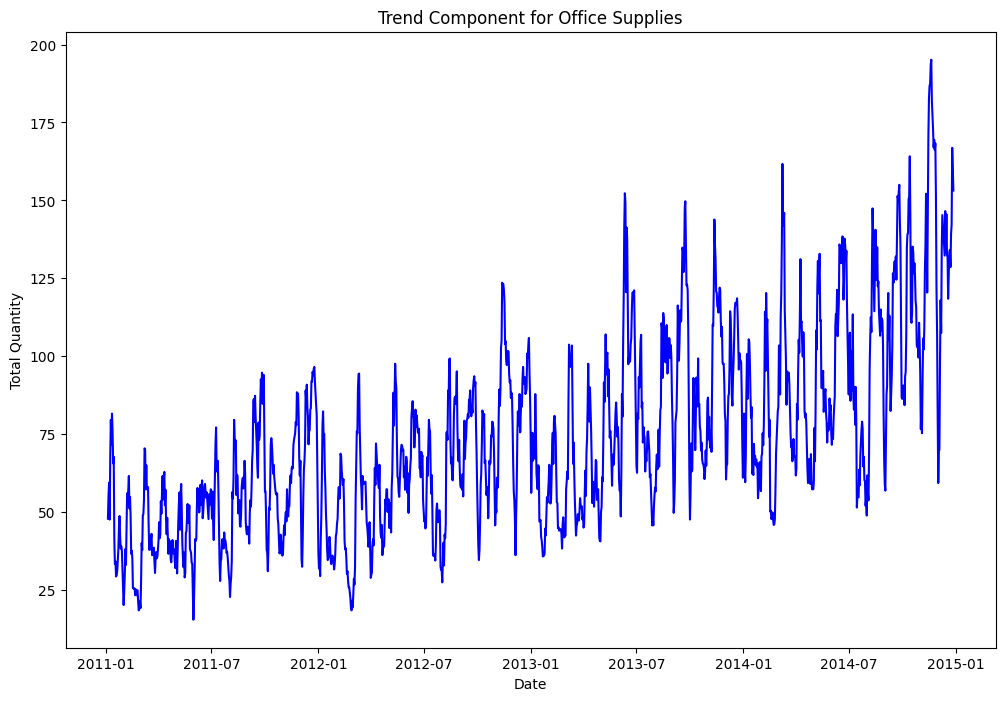

In [191]:
import statsmodels.api as sm

# Get the first unique value in the 'category' column
first_category = df['category'].unique()[0]

# Filter the DataFrame by the first category
df_filtered = df[df['category'] == first_category]

# Resample the filtered DataFrame by day to get the total quantity for each day
df_resampled = df_filtered.groupby('order_date')['quantity'].sum().resample('D').sum()

# Perform an ETS decomposition
decomposition = sm.tsa.seasonal_decompose(df_resampled)

# Create a line plot of the trend component over time
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(decomposition.trend.index, decomposition.trend.values, color='blue')
ax.set_ylabel('Total Quantity')
ax.set_xlabel('Date')
ax.set_title('Trend Component for Office Supplies')

plt.show()

# Overall is an increasing trend

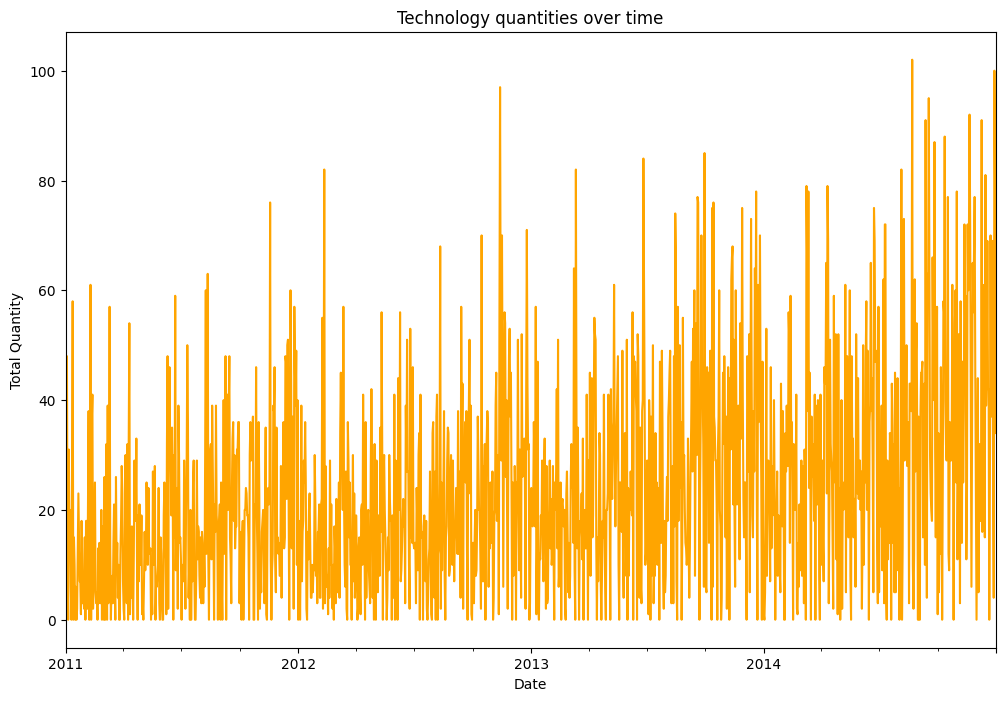

In [192]:
# Get the first unique value in the 'category' column
first_category = df['category'].unique()[1]

# Filter the DataFrame by the first category
df_filtered = df[df['category'] == first_category]

# Resample the filtered DataFrame by day to get the total quantity for each day
df_resampled = df_filtered.groupby('order_date')['quantity'].sum().resample('D').sum()

# Create a line plot of the total quantity over time
fig, ax = plt.subplots(figsize=(12, 8))
df_resampled.plot(ax=ax, color = 'orange')

plt.title('Technology quantities over time')
ax.set_ylabel('Total Quantity')
ax.set_xlabel('Date')

plt.show()

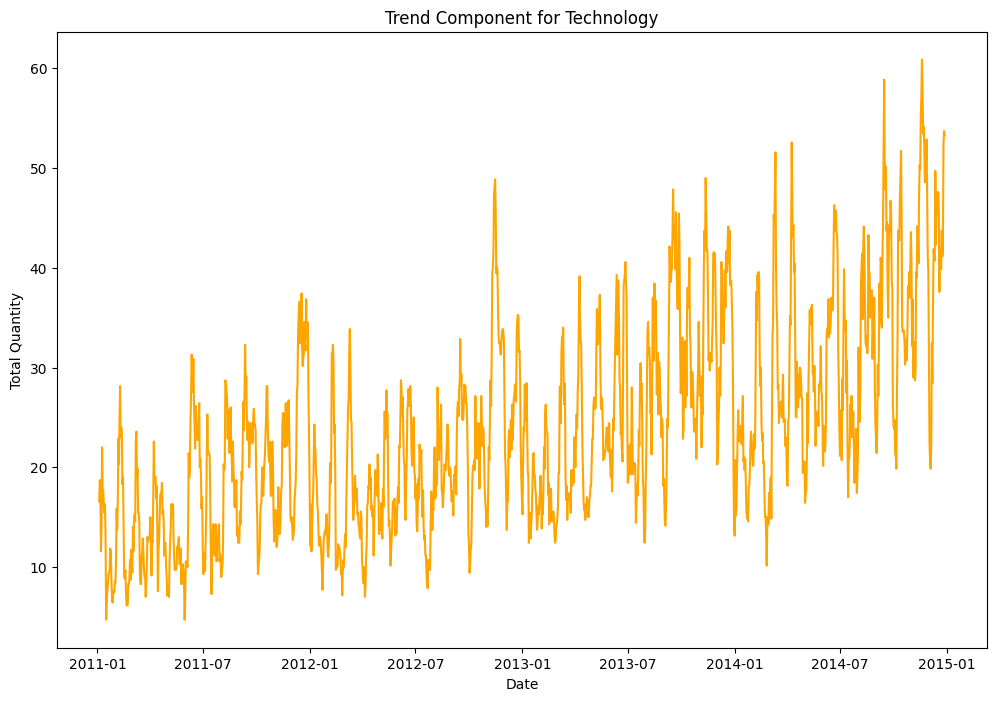

In [193]:
import statsmodels.api as sm

# Get the second unique value in the 'category' column
second_category = df['category'].unique()[1]

# Filter the DataFrame by the second category
df_filtered = df[df['category'] == second_category]

# Resample the filtered DataFrame by day to get the total quantity for each day
df_resampled = df_filtered.groupby('order_date')['quantity'].sum().resample('D').sum()

# Perform an ETS decomposition
decomposition = sm.tsa.seasonal_decompose(df_resampled)

# Create a line plot of the trend component over time
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(decomposition.trend.index, decomposition.trend.values, color='orange')
ax.set_ylabel('Total Quantity')
ax.set_xlabel('Date')
ax.set_title('Trend Component for Technology')

plt.show()

# Overall is an increasing trend

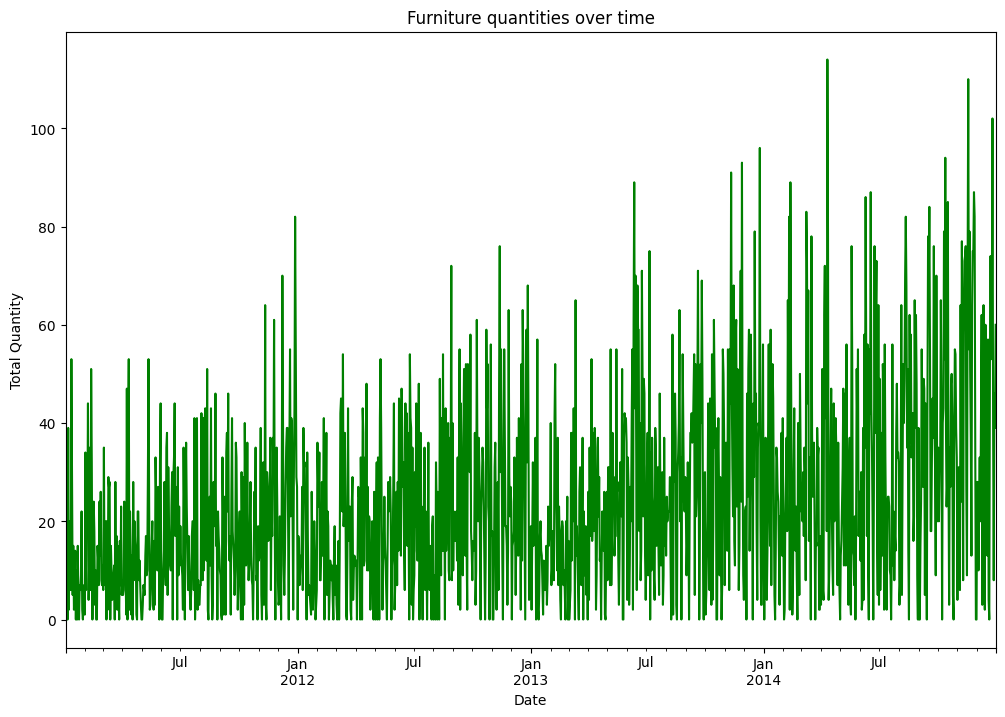

In [194]:
# Get the first unique value in the 'category' column
first_category = df['category'].unique()[2]

# Filter the DataFrame by the first category
df_filtered = df[df['category'] == first_category]

# Resample the filtered DataFrame by day to get the total quantity for each day
df_resampled = df_filtered.groupby('order_date')['quantity'].sum().resample('D').sum()

# Create a line plot of the total quantity over time
fig, ax = plt.subplots(figsize=(12, 8))
df_resampled.plot(ax=ax, color='green')

plt.title('Furniture quantities over time')
ax.set_ylabel('Total Quantity')
ax.set_xlabel('Date')

plt.show()



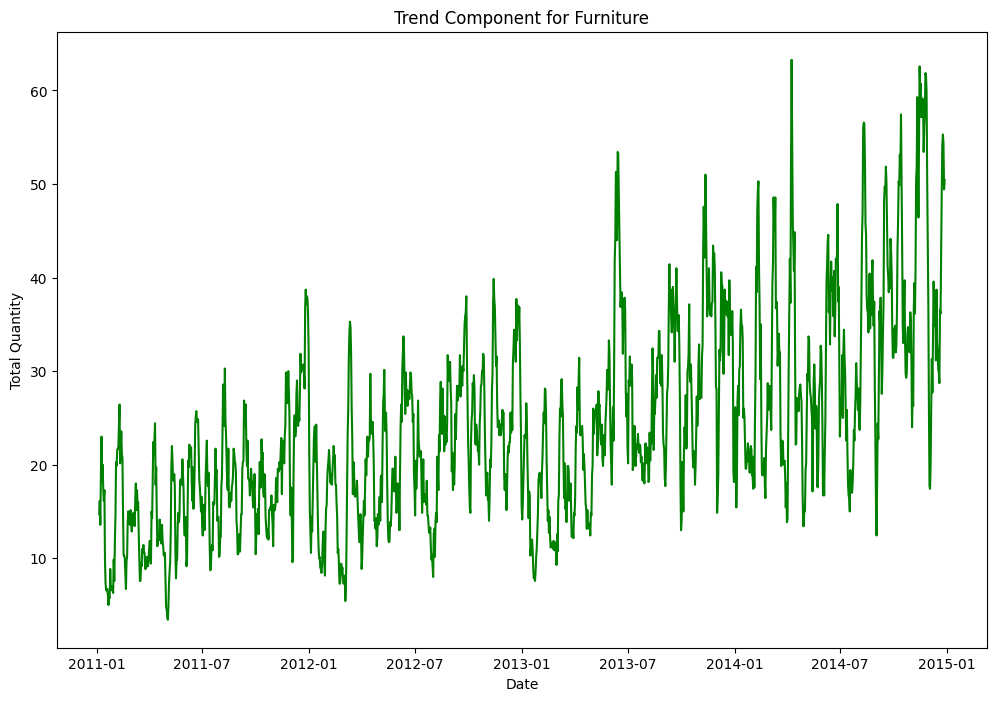

In [195]:
import statsmodels.api as sm

# Get the third unique value in the 'category' column
third_category = df['category'].unique()[2]

# Filter the DataFrame by the third category
df_filtered = df[df['category'] == third_category]

# Resample the filtered DataFrame by day to get the total quantity for each day
df_resampled = df_filtered.groupby('order_date')['quantity'].sum().resample('D').sum()

# Perform an ETS decomposition
decomposition = sm.tsa.seasonal_decompose(df_resampled)

# Create a line plot of the trend component over time
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(decomposition.trend.index, decomposition.trend.values, color='green')
ax.set_ylabel('Total Quantity')
ax.set_xlabel('Date')
ax.set_title('Trend Component for Furniture')

plt.show()

# Overall is an increasing trend

## Conclusion for Q3, there is an overall uptrend for all 3 different product categories over time

# Question 4

## Is there any pattern with regard to how different product sub-categories sell to different markets?

In [196]:
df['sub-category'].value_counts()

Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2221
Appliances     1755
Machines       1484
Tables          861
Name: sub-category, dtype: int64

In [197]:
df['market'].value_counts()

APAC      11002
LATAM     10294
EU        10000
US         9990
EMEA       5029
Africa     4587
Canada      384
Name: market, dtype: int64

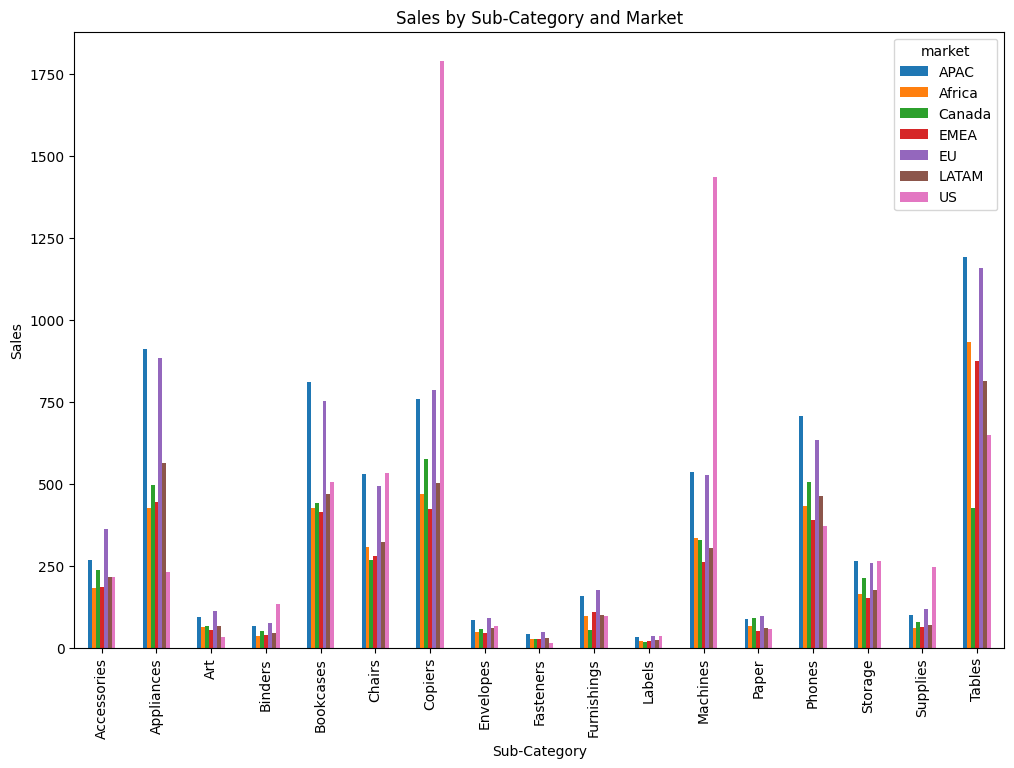

In [198]:
df_pivot = df.pivot_table(index='sub-category', columns='market', values='sales')

# Create a grouped bar chart of the sales for each sub-category and market
fig, ax = plt.subplots(figsize=(12, 8))
df_pivot.plot(kind='bar', ax=ax)
ax.set_ylabel('Sales')
ax.set_xlabel('Sub-Category')
ax.set_title('Sales by Sub-Category and Market')

plt.show()

# Here we can see that US customers like to buy Copiers and Machines

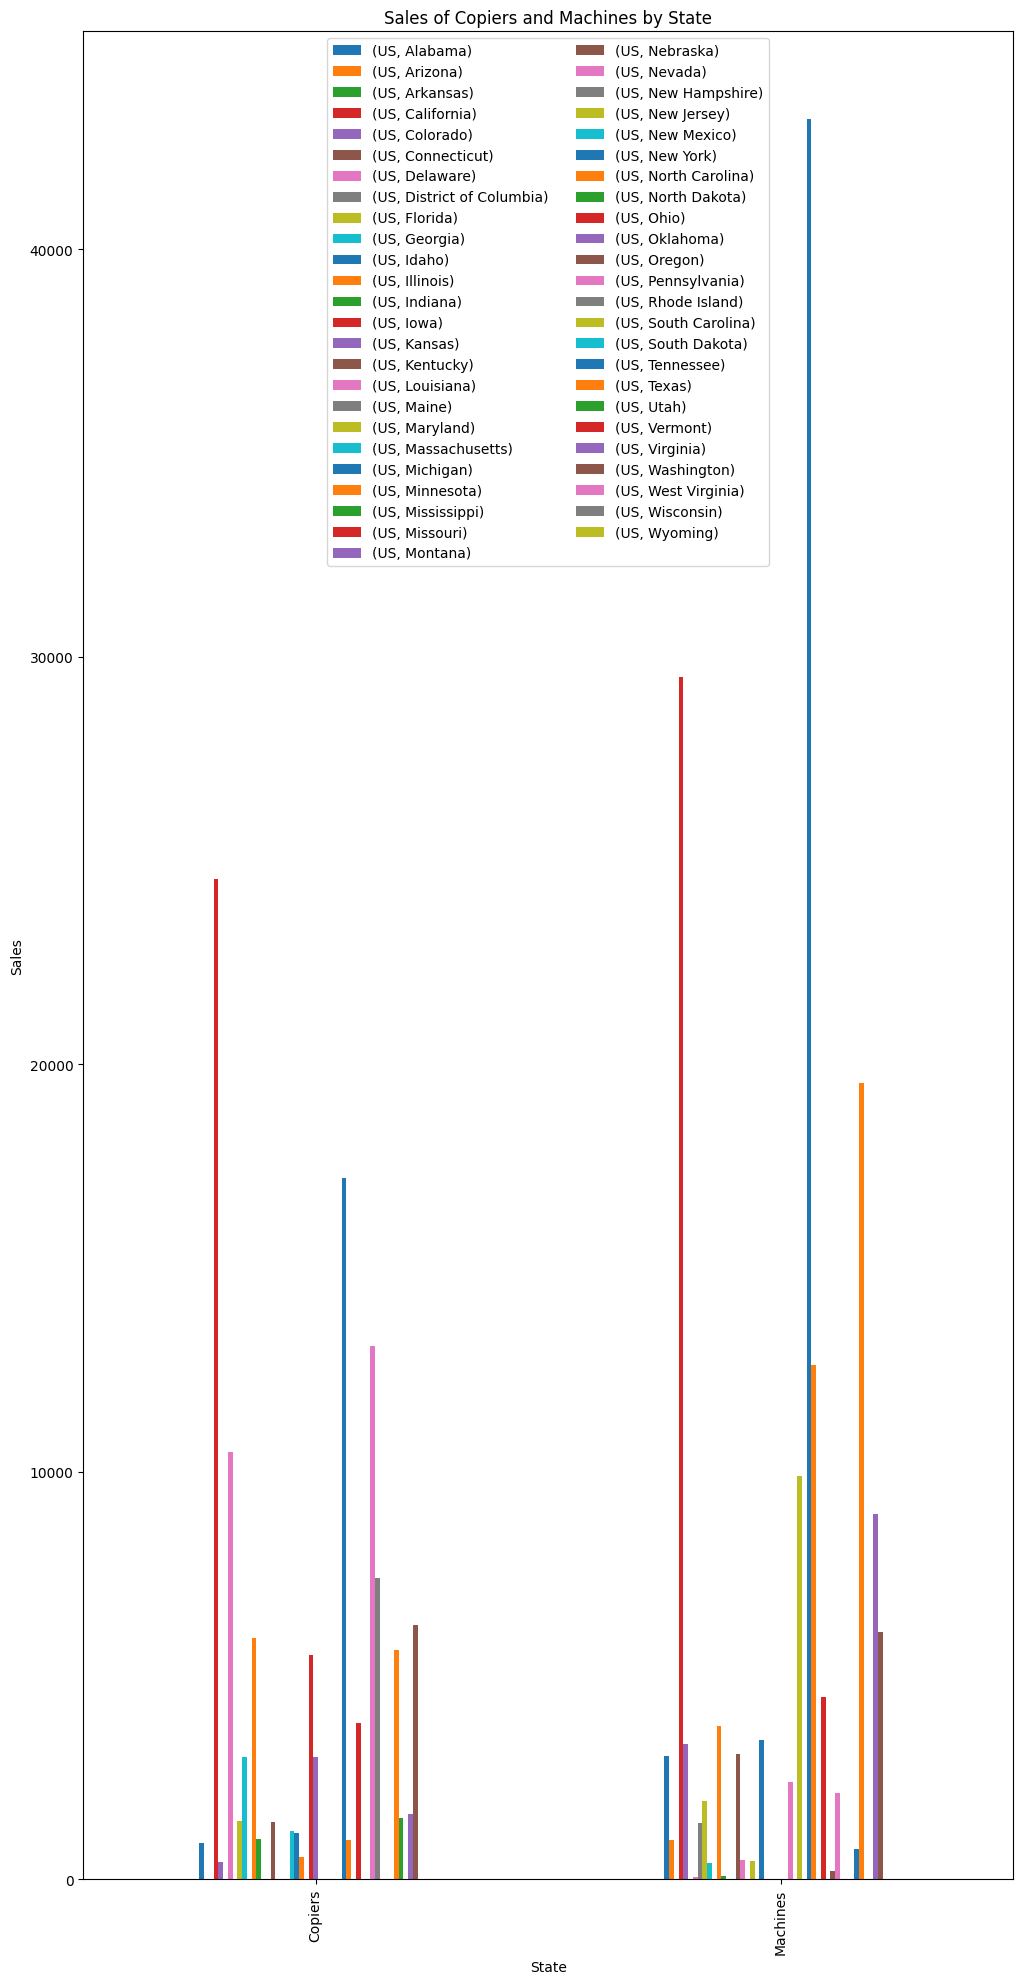

In [199]:
# Pivot the DataFrame by sub-category, market, and state to get the total sales for each combination
df_pivot = df.pivot_table(index='sub-category', columns=['market', 'state'], values='sales', aggfunc='sum')

# Select only the 'Copiers' and 'Machines' sub-categories and the 'US' market
df_filtered = df_pivot.loc[['Copiers', 'Machines'], ('US', slice(None))]

# Create a bar plot of the sales for each state
fig, ax = plt.subplots(figsize=(12, 24))
df_filtered.plot(kind='bar', ax=ax)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=2)

ax.set_ylabel('Sales')
ax.set_xlabel('State')
ax.set_title('Sales of Copiers and Machines by State')

plt.show()


## Conclusion for Q4, the pattern is that copiers and machines have huge demand in the US